In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import math
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip

In [2]:
# importando CSV que foi baixado em: http://staff.pubhealth.ku.dk/~tag/Teaching/share/data/Bodyfat.html
path = 'C:/Users/2104734084/Documents/Modelos_MachineLearning/regressao-linear-multipla/data/'
file_name = 'Bodyfat.csv'

df = pd.read_csv(f"{path}{file_name}")
df


,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [3]:
#Descritiva entre as variáveis:bodyfat e Wrist

In [4]:
df['bodyfat'].describe()

count    252.000000
mean      19.150794
std        8.368740
min        0.000000
25%       12.475000
50%       19.200000
75%       25.300000
max       47.500000
Name: bodyfat, dtype: float64

In [5]:
df['Wrist'].describe()

count    252.000000
mean      18.229762
std        0.933585
min       15.800000
25%       17.600000
50%       18.300000
75%       18.800000
max       21.400000
Name: Wrist, dtype: float64

<AxesSubplot:xlabel='bodyfat'>

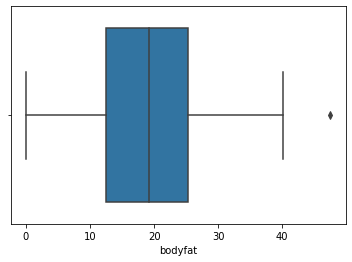

In [6]:
sns.boxplot(x=df['bodyfat'])
#Repare que existem valores muito discrepantes, portanto, é necessário entender se existe 
#  necessidade de eliminar os dados.

<AxesSubplot:xlabel='Wrist'>

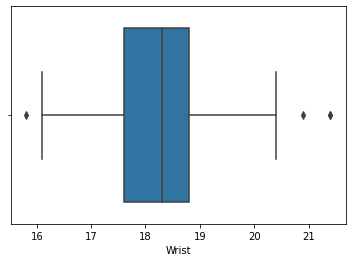

In [7]:
sns.boxplot(x=df['Wrist'])

<AxesSubplot:>

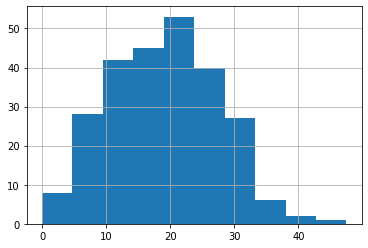

In [8]:
df['bodyfat'].hist()

<AxesSubplot:>

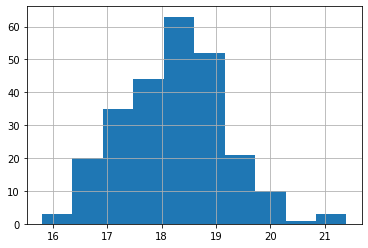

In [9]:
df['Wrist'].hist()

In [10]:
#Principio de regressão linear está em cima do erro. O método matemático para estimação dos parametros
# é o método dos minímos quadrados (pois queremos errar o menos possível).
#Parametro é um argumento, um número (que consigo chegar nele através de um método matemático)
#Equação da Regressão Linear: Y = B0+B1x+B2x+Bnx
#O bom da regressão linear é que podemos interpretar parâmetros, onde:
# - B0: A cada incremento de uma unidade na sua variável x1 eu tenho um incremento estimado de B0
#Quão bom o meu modelo é? Métricas de qualidade para modelos de Regressão
# - R2: O quanto o meu modelo está expicado da variabilidade dos dados
# - MSE: Erro médio ao quadrado (Ele não é interpretado)
# - RMSE: Se deu 50, significa que em média o seu modelo está errando 50 para cima ou para baixo.

<AxesSubplot:xlabel='Wrist', ylabel='bodyfat'>

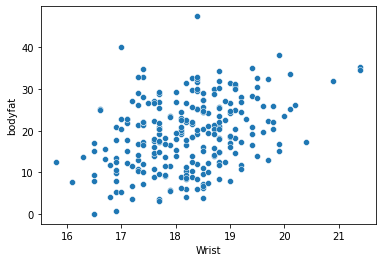

In [11]:
#Entender se os dados possuem uma relação Linear com o y a ser estimado
sns.scatterplot(data=df, x='Wrist', y='bodyfat')

In [12]:
#Olhando os dados acima, podemos ver que eles estão super espaçados, portanto, existe uma grande variabilidade.
#Teremos um R² alto, pois o R² baixo seria quando os pontos estão muito próximos da reta.

In [13]:
#Realizando a Regressão Linear

In [14]:
formula= 'bodyfat~Wrist'
model = smf.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     34.13
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           1.60e-08
Time:                        15:36:36   Log-Likelihood:                -876.32
No. Observations:                 252   AIC:                             1757.
Df Residuals:                     250   BIC:                             1764.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.4841      9.707     -3.861      0.0

In [15]:
# Como podemos identificar acima, o R²(R-squared) deu um valor extremamente baixo, ou seja, significa
# que essa variável não é variável boa para o contexto.
# Precisamos de criatividade para criar variávels que façam sentido para o contexto.

In [16]:
# Regressão Linear Múltipla
# Na regressão linear existe o princípio da parcimônia que é fazer menos com mais, portanto, quanto menos
# variáveis melhor e no modelo, temos o R2 ajustado que nos diz qual modelo é melhor, mas o melhor é usarmos
# o RMSE para definir o melhor modelo.

In [17]:
# Criando um outro modelo com outra variável

In [18]:
formula= 'bodyfat~Abdomen+Biceps'
model = smf.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     252.1
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           1.44e-60
Time:                        15:36:36   Log-Likelihood:                -753.00
No. Observations:                 252   AIC:                             1512.
Df Residuals:                     249   BIC:                             1523.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.4406      3.314    -10.391      0.0

In [19]:
# Tivemos um R2 de 0,66. Significa que o meu modelo entende aproximadamente 67% da variabilidade dos meus dados.
# Já no modelo anterior o modelo entendia apenas 12%.
# Comparando os dois modelos olhando o R2 Ajustado, tinhamos no anterior 0,11 contra 0,66, ou seja,
# o segundo modelo é melhor.

In [20]:
# Mas então quais variáveis são significativa? Devo colocar todas variáveis?
# F: Teste Golbal, qro saber se alguma variável presta
# T: Teste individual, vou testar parametro a parametro

In [21]:
# Se algum parâmetro for zero, siginifica que aquela variável não é significcativa para o modelo.
# O Teste T fica na coluna P> |t| e se for diferente de zero, significa se a variável é importante para o meu
#modelo.

In [22]:
#Modelo usando todas as variáveis para observar todas as variáveis.

In [23]:
df.columns

Index(['Density', 'bodyfat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [24]:
formula= 'bodyfat~Age+Weight+Height+Neck+Chest+Abdomen+Hip+Thigh+Knee+Ankle+Biceps+Forearm+Wrist'
model = smf.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           7.72e-64
Time:                        15:36:36   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.1885     17.349     -1.048      0.2

In [25]:
#Para eu escrever a minha função, preciso excluir as variáveis não significativas.
#Quanto quanto maior o Pvalor (P>|t|) mais inutil é a minha variável
#No caso acima a variável mais inutil seria a Chest

In [26]:
#Portanto para gerarmos a equação, precisamos tirar o mais inutil e rodar a função novamente.
#E então excluo o parametro mais inútil e rodo novamente e sigo fazendo esse looping

In [27]:
# Precisamos escolher algum método para seleção de variáveis:
# Forward: A festa começa sozinha, o segurança chega na hora e olha quem é o mais legal e coloca para dentro,
# escolhe o segundo mais legal e coloca para dentro.

# Escolhe isso baseado no Pvalor

In [28]:
# Backward: a festa começa com todo mundo, o segurança vai eliminando os problemáticos na festa.

In [29]:
# Stepwise: Começa sem nenhuma variável, vou adicionando e vendo se estão indo bem, se elas "tretarem", eu vou lá e tiro.

In [30]:
# Poderia adotar outra estratégia, onde eu olharia os erros (AIC), vendo se aquela variável melhora ou piora
# o meu erro.

In [31]:
#Fazendo um modelo com todas variáveis, menos a density

In [32]:
df = df.drop(['Density'], axis=1)

In [33]:
df_x=df.drop(['bodyfat'], axis=1)

In [34]:
var_independete=df_x.columns

In [35]:
var_dependente='bodyfat'

In [36]:
#Criando x e y
x = df[var_independete]
y = df[var_dependente]

In [37]:
#Adicionando intercepto
x = sm.add_constant(x)

In [38]:
x

,const,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [39]:
#Fazendo modelo com todas variáveis, exceto density
model_sm = sm.OLS(y,x).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bodyfat   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           7.72e-64
Time:                        15:36:37   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.1885     17.349     -1.048      0.296     -52.365      15.988
Age            0.0621      0.032      1.919      0.056      -0.002       0.126
Weight        -0.0884      0.054     -1.652      0.100      -0.194       0.017
Height        -0.0696      0.096     -0.725      0.469      -0.259       0.120
Neck          -0.4706      0.232     -2.024      0.044      -0.929      -0.013
Chest         -0.0239      0.099     -0.241      0.810      -0.219       0.171
Abdomen        0.9548      0.086     11.044      0.000       0.784       1.125
Hip           -0.2075      0.146     -1.422      0.156      -0.495       0.080
Thigh          0.2361      0.144      1.636      0.103      -0.048       0.520
Knee           0.0153      0.242      0.063      0.950      -0.461       0.492
Ankle          0.1740      0.221      0.786      0.433      -0.262       0.610
Biceps         0.1816      0.171      1.061      0.290      -0.156       0.519
Forearm        0.4520      0.199      2.270      0.024       0.060       0.844
Wrist         -1.6206      0.535     -3.030      0.003      -2.674      -0.567
==============================================================================
Omnibus:                        4.404   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                2.820
Skew:                          -0.012   Prob(JB):                        0.244
Kurtosis:                       2.482   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
#Estratégia para adicionar as melhores variáveis:
#Métodos de seleção de variáveis

In [42]:
#Forward
# Nao eh nativo, entao peguei uma def pronta
# metodo forward, que tomar decisao baseado no adjusted R-squared

def forward_selected(data, response):
    """ Forward stepwise regression algorithm, the source code is from https://planspace.org/20150423-forward_selection_with_statsmodels/
         Use Adjusted R-squared to judge whether the newly added parameters improve the statistical significance in the regression
    Linear model designed by forward selection.
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response
    response: string, name of response column in data
    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
 
    return model

In [46]:
#chamando a funcao para nosso problema

def main():
         #Set the target variable
    model = forward_selected(df, 'bodyfat')
 
         #Print out the final regression model
    print("Equacao", model.model.formula)
    
    
    print("Parametros", model.params)
    
    print("R2", model.rsquared_adj)
    
if __name__ == '__main__':
    main()

Equacao bodyfat ~ Abdomen + Weight + Wrist + Forearm + Neck + Age + Thigh + Hip + Biceps + 1
Parametros Intercept   -23.304992
Abdomen       0.949261
Weight       -0.098425
Wrist        -1.542084
Forearm       0.451496
Neck         -0.493295
Age           0.063483
Thigh         0.265379
Hip          -0.182871
Biceps        0.178890
dtype: float64
R2 0.7383503647269756


In [47]:
# para eu ver o summary completo
formula = 'bodyfat ~ Abdomen + Weight + Wrist + Forearm + Neck + Age + Thigh + Hip + Biceps + 1'
modelo = smf.ols(formula=formula, data=df).fit() 
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     79.70
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           2.75e-67
Time:                        15:47:38   Log-Likelihood:                -718.91
No. Observations:                 252   AIC:                             1458.
Df Residuals:                     242   BIC:                             1493.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -23.3050     11.727     -1.987      0.0

In [48]:
#Stepwise
# outra funcao (agora stepwise), que agora seleciona pelo p-valor
def stepwise_selection(X, y, 
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
        """ Perform a forward-backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X - pandas.DataFrame with candidate features
            y - list-like with the target
            initial_list - list of features to start with (column names of X)
            threshold_in - include a feature if its p-value < threshold_in
            threshold_out - exclude a feature if its p-value > threshold_out
            verbose - whether to print the sequence of inclusions and exclusions
        Returns: list of selected features 
        Always set threshold_in < threshold_out to avoid infinite looping.
        See https://en.wikipedia.org/wiki/Stepwise_regression for the details
        """
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

In [49]:
# chamando para o nosso problema
result = stepwise_selection(x, y)

print('resulting features:')
print(result)

C:\Users\2104734084\AppData\Local\Temp\ipykernel_22032\2829660767.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  const                          with p-value 6.17665e-102
Add  Abdomen                        with p-value 9.09007e-61
Add  Weight                         with p-value 1.20706e-11


C:\Users\2104734084\AppData\Local\Temp\ipykernel_22032\2829660767.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\2104734084\AppData\Local\Temp\ipykernel_22032\2829660767.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\2104734084\AppData\Local\Temp\ipykernel_22032\2829660767.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Wrist                          with p-value 0.00468238
Add  Forearm                        with p-value 0.00979016
resulting features:
['const', 'Abdomen', 'Weight', 'Wrist', 'Forearm']


C:\Users\2104734084\AppData\Local\Temp\ipykernel_22032\2829660767.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\2104734084\AppData\Local\Temp\ipykernel_22032\2829660767.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


In [51]:
# para eu ver o summary completo
formula_2 = 'bodyfat ~ Abdomen + Weight + Wrist + Forearm + 1'
modelo_2 = smf.ols(formula=formula_2, data=df).fit() 
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     171.3
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           5.39e-70
Time:                        15:54:26   Log-Likelihood:                -725.11
No. Observations:                 252   AIC:                             1460.
Df Residuals:                     247   BIC:                             1478.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.8541      7.245     -4.811      0.0